## Statistics Class: Lab 3 Solutions

In [1]:
#Import libraries needed for the lab
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('../Datasets/Friction.xlsx')
df.head()

,TEST,Friction
0,TEST 01,0.083497
1,TEST 01,0.083357
2,TEST 01,0.080469
3,TEST 01,0.078255
4,TEST 01,0.078255


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
TEST        150 non-null object
Friction    150 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


### a. Plot the friction results over tests to see if there is any visual evidence of differences in mean friction from one test to another. What do you conclude visually?

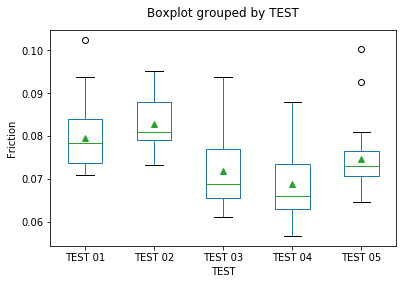

In [4]:
df.boxplot(
    column='Friction',
    by='TEST',
    grid=False,
    showmeans=True
)

plt.title('')
plt.ylabel('Friction')
plt.show()

**Answer:** Visually, Test 01 and 02 have the highest friction, while the other tests are much lower. Additionally, Test 05 has less variation than the other tests.

### b. Conduct an analysis of variance on the data to determine if there is a significant difference in mean frictions

In [5]:
# b. One-way ANOVA test to determine significance in means
formula = 'Friction ~ C(TEST)'
model = sm.formula.ols(formula, df).fit()
aov_table = sm.stats.anova_lm(model)
print(aov_table)

             df    sum_sq   mean_sq          F        PR(>F)
C(TEST)     4.0  0.003829  0.000957  17.184808  1.473902e-11
Residual  145.0  0.008076  0.000056        NaN           NaN


**Answer:** Because $p<.05$, we reject the null hypothesis that all sample means are equal. 

### c. Conduct a multiple comparison test using the Tukey-Kramer HSD method to determine which tests are different than others

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower   upper  reject
-----------------------------------------------
TEST 01 TEST 02  0.0033   -0.002  0.0086 False 
TEST 01 TEST 03 -0.0076  -0.0129 -0.0022  True 
TEST 01 TEST 04 -0.0107   -0.016 -0.0054  True 
TEST 01 TEST 05 -0.0049  -0.0102  0.0004 False 
TEST 02 TEST 03 -0.0108  -0.0162 -0.0055  True 
TEST 02 TEST 04  -0.014  -0.0193 -0.0087  True 
TEST 02 TEST 05 -0.0082  -0.0135 -0.0029  True 
TEST 03 TEST 04 -0.0032  -0.0085  0.0022 False 
TEST 03 TEST 05  0.0027  -0.0027  0.008  False 
TEST 04 TEST 05  0.0058   0.0005  0.0111  True 
-----------------------------------------------


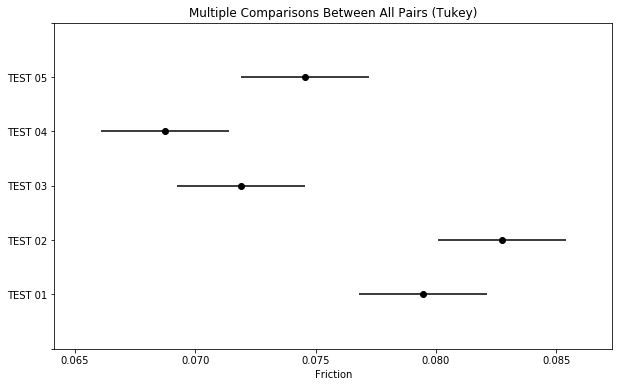

In [6]:
res = sm.stats.multicomp.pairwise_tukeyhsd(endog=df['Friction'], groups=df['TEST'])

print(res.summary())

res.plot_simultaneous(xlabel='Friction')
plt.show()

### d. Conduct a multiple comparison test using the Compare Best, Hsu MCB method to determine if any of the tests produced a stastically superior result (i.e. significantly higher mean friction). What do you conclude?

In [7]:
#Use jmp for this exercise